In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelFile

In [39]:
my_path='/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/for_random_data_lastfour_year.csv'
    
data = pd.read_csv(my_path)
data.head(2)

,Unnamed: 0,DOI,Title,Abstract,Date,Journal,catalyst,reactant,Method,Product
0,0,10.1016/j.psep.2022.11.027,Optimal sorting and recycling of plastic waste...,This work suggests an optimal strategy to sort...,January 2023,Process Safety and Environmental Protection,[],"['plastic waste', 'plastic', 'high-density pol...","['pyrolysis', 'pyrolysis oil']","['renewable energy resource', 'polystyrene', '..."
1,1,10.1016/j.ecolecon.2022.107535,The effects of the containers and packaging re...,This study investigates the impact of a policy...,November 2022,Ecological Economics,[],"['plastic waste', 'post-consumer plastic waste...",[],[]


In [40]:
indeeee = []
for i in range(len(data)):
    if int(data.Date[i][-4:]) == 2023:
        if len(data.catalyst[i]) != 0:
            
            indeeee.append(i)
len(indeeee)

529

In [41]:
data = data.iloc[indeeee].reset_index(drop=True)
len(data)

529

In [42]:
#The reactant columns
x=data.iloc[:,9].values

In [43]:
y=[]
List=[]
for i in range(len(data)):
    lis = x[i].split('[')
    gis = lis[1].split(']')
    his = gis[0].split("'")
    J=[]
    for k in range(1, len(his)-1):
        if(his[k]!=' '):
            J.append(his[k])
    List.append(J)
    #print(J)

In [7]:
for i in range(0, len(List)):
    for j in range(0, len(List[i])):
        v=List[i][j]
#         if(y.count(v)==0):
        y.append(v)

# ZIPF plot

In [63]:
#visualization library
import matplotlib.pyplot as plt
from pylab import *
from matplotlib import rc

#Utilize the wordcloud library
from wordcloud import WordCloud

#Import the warning library
import warnings
warnings.filterwarnings("ignore")

In [64]:
#define the function for get the name of chemical entities and their frequency
def get_chemical_entry_count(column, size):
    catal = []
    #Remove the all punctution
    catalyst_column= pd.Series(column).str.replace('[^\w\s]','')
    for i in range(size):
        cat_list = catalyst_column[i].split(" ")
        for j in range(len(cat_list)):
            #Appending the catalyst
            catal.append(cat_list[j])
            #frequency of existence
            unique, frequency = np.unique(np.array(catal), return_counts = True)
            #Making data frame of uniqueness and frequency
            df_unique_counts = pd.DataFrame({'section name' : unique, 'frequency' : frequency})
            
    return df_unique_counts

In [65]:
#Call the defined function
df_cat_freq = get_chemical_entry_count(y, len(y))

In [66]:
#Sorting the data frame based on frequency available
sort = df_cat_freq.sort_values("frequency", axis = 0, ascending = False).reset_index(drop = True)
#print(Number of unique chemicals)
print('Number of unique chemicals:', sort.shape[0])
#Shows the first 5 rows
sort.head()

Number of unique chemicals: 31


,section name,frequency
0,,64
1,zeolite,5
2,SiO2,4
3,Ni,3
4,Mg,2


In [12]:
#year 2020
df_list_catalyst = sort

In [25]:
#year 2021
df_list_catalyst1 = sort


In [37]:
#2022
df_list_catalyst2 = sort

In [49]:
#2023
df_list_catalyst3 = sort

In [50]:
#A zipf line plot is shown
counts = df_list_catalyst.frequency
tokens = df_list_catalyst['section name']

ranks = np.arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

In [51]:
#A zipf line plot is shown
counts1 = df_list_catalyst1.frequency
tokens1 = df_list_catalyst1['section name']

ranks1 = np.arange(1, len(counts1)+1)
indices1 = argsort(-counts1)
frequencies1 = counts1[indices1]

In [52]:
#A zipf line plot is shown
counts2 = df_list_catalyst2.frequency
tokens2 = df_list_catalyst2['section name']

ranks2 = np.arange(1, len(counts2)+1)
indices2 = argsort(-counts2)
frequencies2 = counts2[indices2]

In [53]:
#A zipf line plot is shown
counts3 = df_list_catalyst3.frequency
tokens3 = df_list_catalyst3['section name']

ranks3 = np.arange(1, len(counts3)+1)
indices3 = argsort(-counts3)
frequencies3 = counts3[indices3]

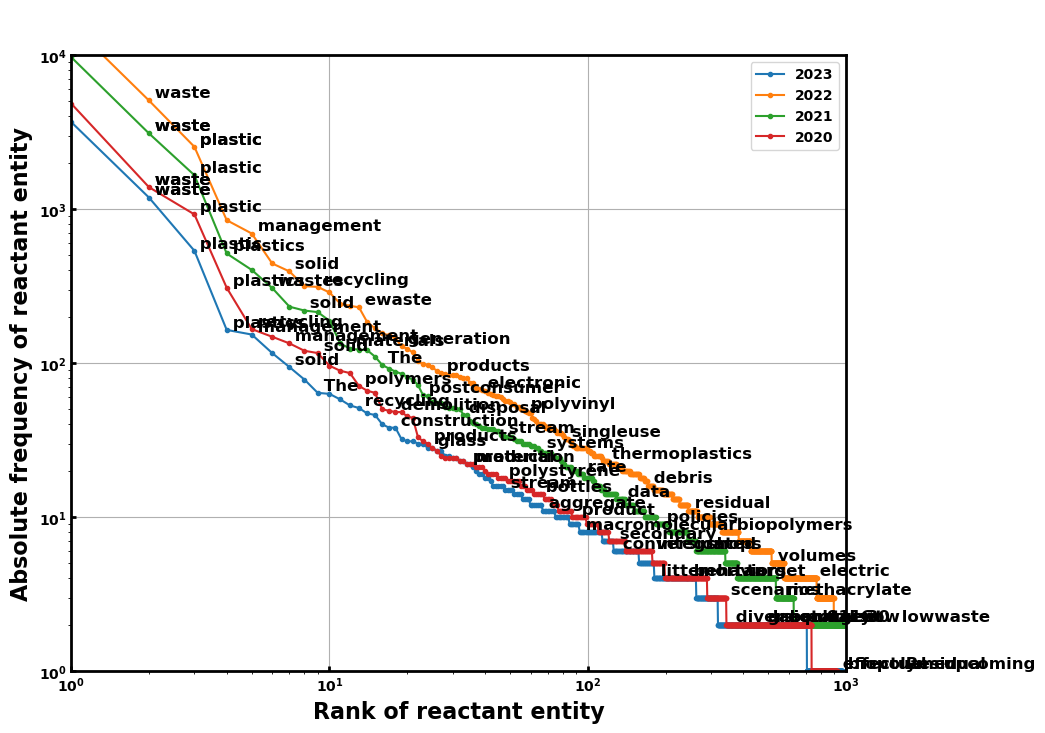

In [56]:


plt.figure(figsize=(10,8))

plt.ylim(1,10**4)
plt.xlim(1,10**3)

loglog(ranks3, frequencies3, marker=".", label = '2023')
loglog(ranks2, frequencies2, marker=".", label = '2022')
loglog(ranks1, frequencies1, marker=".", label = '2021')
loglog(ranks, frequencies, marker=".", label = '2020')



xlabel("Rank of reactant entity",fontweight='bold', fontsize=16)
ylabel("Absolute frequency of reactant entity",fontweight='bold', fontsize=16)

plt.rcParams['axes.linewidth'] = 2
rc('font', weight='bold')

plt.tick_params(axis="x", direction="in",width=2)
plt.tick_params(axis="y", direction="in", width=2)

grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left", fontweight='bold',
                 fontsize=12)
    
for n in list(logspace(-0.5, log10(len(counts1)-2), 25).astype(int)):
    dummy1 = text(ranks1[n], frequencies1[n], " " + tokens1[indices1[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left", fontweight='bold',
                 fontsize=12)
    
for n in list(logspace(-0.5, log10(len(counts2)-2), 25).astype(int)):
    dummy2 = text(ranks2[n], frequencies2[n], " " + tokens2[indices2[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left", fontweight='bold',
                 fontsize=12)
    
for n in list(logspace(-0.5, log10(len(counts3)-2), 25).astype(int)):
    dummy3 = text(ranks3[n], frequencies3[n], " " + tokens3[indices3[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left", fontweight='bold',
                 fontsize=12)
#Save the plot
plt.legend()
plt.savefig(r'/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/random_testing/reactant/zipf_reactant_text.pdf', dpi=5000)

plt.show()

In [44]:
for i in range(0, len(List)):
    for j in range(0, len(List[i])):
        v=List[i][j]
        if(y.count(v)==0):
            y.append(v)

In [45]:
len(y)

new_y = []
for lis in y:
    if 'waste' not in y:
        new_y.append(y)


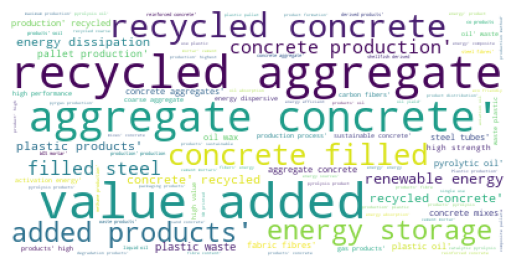

In [46]:
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

# Joining all the processed lines together. Whole PDF
long_string = ''.join([str(i) for i in new_y])

# WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=100000, 
                      contour_width=5, 
                      contour_color='steelblue',
                      repeat = False,
                      relative_scaling = 0.5,
                      min_font_size=3,
                      max_font_size = 40)
wordcloud.generate(long_string)

# Visualizing
wordcloud.to_image()

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/random_testing/product/product_2023.pdf',dpi=2000,bbox_inches='tight')
plt.show()

**The catalyst**

In [15]:
import pandas as pd
import numpy as np

In [16]:
#The reactant columns
x=data['catalyst'].values


In [17]:
y=[]
List=[]
for i in range(len(data)):
    lis = x[i].split('[')
    gis = lis[1].split(']')
    his = gis[0].split("'")
    J=[]
    for k in range(1, len(his)-1):
        if(his[k]!=' '):
            J.append(his[k])
    List.append(J)
    #print(J)

In [18]:
for i in range(0, len(List)):
    for j in range(0, len(List[i])):
        v=List[i][j]
        if(y.count(v)==0):
            y.append(v)

In [19]:
print(len(y))
print(y)

94
['Ni-REY', 'zeolite', 'Co3O4', 'Fe/SiO2', 'Ru/Al2O3', 'Fe2O3', 'aluminum', ', ', 'alkylaluminum', 'CaO', 'NiAl', 'Al2O3', 'MgO', 'Ni', 'montmorillonite', 'cobalt', 'Co/30', 'CeO2/30', 'hydrodesulfurizated', 'Zn/C', 'Zn/C-III', 'ZnCl2', 'chlorine', 'nickel', 'Cl', 'Ni-based', 'TiO2', 'CuNiIn', 'glucose', 'Y-zeolite', 'copper', 'Si/Al', 'Y-Zeolite/ZnO', 'Ni/SiO2-S', 'Li/NaY', 'CNF-PEI', 'Pt', 'Ni–Pd/Al2O3', 'MnO2/HGO', 'titania', 'FeCl3', 'Co/Mo', 'Fe', 'Mo', 'CoFe2O4', 'Zn', 'Co', 'KOH', 'sulfonic', 'Ni/Al2O3', 'ZnO-based', 'Ru', 'Mn-Ce', 'oxide', 'Mn', 'Fe-based', 'NiFe2O4', 'zeolites', 'chlorine-containing', 'Ru-based', 'Ni–Mg–Al–CaO', 'Fe-SBA-15', 'Fe/Si', 'nickel-based', 'Ni/ZSM-5', 'Ni/sphere', 'Cl-containing', 'Ni/ZSM5-30', 'Ni/CeO2/Al2O3', 'Ag', 'Ni-Fe/γ-Al2O3', 'Titanium', 'Cu', 'Mg', 'Al', 'Mgx-Aly-O', 'platinum', 'Cu-Al2O3', 'Fe3O4', 'copper-', 'palladium', 'organoiodine', 'iodine-functionalized', 'iodine', 'ruthenium/catalyst', 'iron', 'AgNPs', 'Nickel', 'H2SO4', 'TiO2-bas

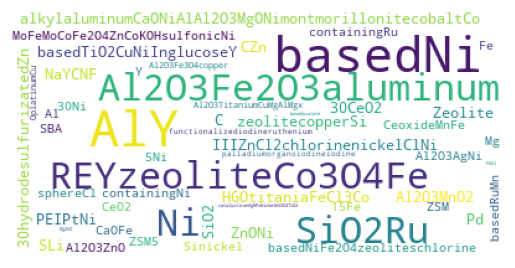

In [20]:
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

# Joining all the processed lines together. Whole PDF
long_string = ''.join([str(i) for i in y])

# WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=100000, 
                      contour_width=5, 
                      contour_color='steelblue',
                      repeat = False,
                      relative_scaling = 0.5,
                      min_font_size=3,
                      max_font_size = 40)
wordcloud.generate(long_string)

# Visualizing
wordcloud.to_image()

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/word_cloud/cata_word_cloud.pdf',dpi=2000,bbox_inches='tight')
plt.show()

**Method**

In [21]:
import pandas as pd
import numpy as np

In [22]:
#The reactant columns
x=data['Method'].values


In [23]:
y=[]
List=[]
for i in range(len(data)):
    lis = x[i].split('[')
    gis = lis[1].split(']')
    his = gis[0].split("'")
    J=[]
    for k in range(1, len(his)-1):
        if(his[k]!=' '):
            J.append(his[k])
    List.append(J)
    #print(J)

In [24]:
for i in range(0, len(List)):
    for j in range(0, len(List[i])):
        v=List[i][j]
        if(y.count(v)==0):
            y.append(v)

In [25]:
print(len(y))
print(y)

5078
['thermal', ', ', 'thermal decomposition products', 'pyrolysis', 'pyrolysis reactions', 'pyrolysis products', 'Its degradation products', 'degradation', 'fragmentation degradation rates', 'plastic degradation', 'photocatalytic degradation', 'The synergetic degradation mechanism', 'conversion', 'rapid conversion', 'thermal digestion (TD) technique', 'Thermogravimetric-Differential thermal analysis', 'thermal decomposition behavior', 'maximum degradation percentage', 'maximum degradation percentages', 'degradation percentages', 'non-isothermal CO2 gasification tests', 'degradation mechanisms', 'overall conversion', 'total conversion', '60 % conversion', 'maximum conversion', '>85% conversion', 'Thermal catalytic pyrolysis technologies', 'glycolysis', 'glycolysis process', 'better thermal insulation behaviour', 'thermal insulation material', 'thermal insulation behavior', 'thermal insulation', 'depolymerization', 'enzymatic depolymerization', 'pyrolysis-gas chromatography-mass spectr

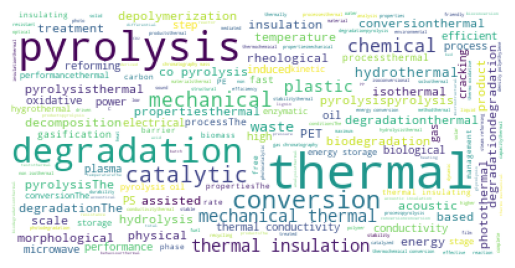

In [26]:
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

# Joining all the processed lines together. Whole PDF
long_string = ''.join([str(i) for i in y])

# WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=100000, 
                      contour_width=5, 
                      contour_color='steelblue',
                      repeat = False,
                      relative_scaling = 0.5,
                      min_font_size=3,
                      max_font_size = 40)
wordcloud.generate(long_string)

# Visualizing
wordcloud.to_image()

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/word_cloud/method_word_cloud.pdf',dpi=2000,bbox_inches='tight')
plt.show()

**Product**

In [71]:
import pandas as pd
import numpy as np

In [72]:
#The reactant columns
x=data['Product'].values


In [73]:
y=[]
List=[]
for i in range(len(data)):
    lis = x[i].split('[')
    gis = lis[1].split(']')
    his = gis[0].split("'")
    J=[]
    for k in range(1, len(his)-1):
        if(his[k]!=' '):
            J.append(his[k])
    List.append(J)
    #print(J)

In [74]:
for i in range(0, len(List)):
    for j in range(0, len(List[i])):
        v=List[i][j]
        if(y.count(v)==0):
            y.append(v)

In [75]:
print(len(y))


3524


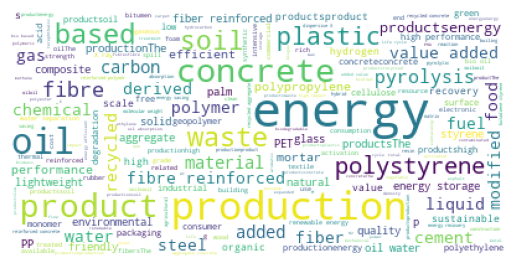

In [32]:
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

# Joining all the processed lines together. Whole PDF
long_string = ''.join([str(i) for i in y])

# WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=100000, 
                      contour_width=5, 
                      contour_color='steelblue',
                      repeat = False,
                      relative_scaling = 0.5,
                      min_font_size=3,
                      max_font_size = 40)
wordcloud.generate(long_string)

# Visualizing
wordcloud.to_image()

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/word_cloud/products_word_cloud.pdf',dpi=2000,bbox_inches='tight')
plt.show()

**Reactant**

In [33]:
import pandas as pd
import numpy as np

In [34]:
#The reactant columns
x=data['reactant'].values


In [35]:
y=[]
List=[]
for i in range(len(data)):
    lis = x[i].split('[')
    gis = lis[1].split(']')
    his = gis[0].split("'")
    J=[]
    for k in range(1, len(his)-1):
        if(his[k]!=' '):
            J.append(his[k])
    List.append(J)
    #print(J)

In [36]:
for i in range(0, len(List)):
    for j in range(0, len(List[i])):
        v=List[i][j]
        if(y.count(v)==0):
            y.append(v)

In [37]:
print(len(y))
print(y)

20923
['recycling polymer composites', ', ', 'polymer matrix', 'frequently thermoplastics', 'polymer composites', 'successful plastic composite recycling', 'polyolefin waste', 'total plastic waste', '50% polypropylene', 'wastes', 'plastic accumulation challenges', 'plastic products', 'polymeric properties', 'polymeric function', 'plastics', 'plastic polymer types', 'plastic degradation', 'low density polyethylene', 'plastic film', 'optimum plastic content', 'unaged plastic-modified mixture', 'LDPE waste', 'polyethylene terephthalate (PET) waste', 'solid organic waste', 'waste management', 'polylactic acid melt-blown non-woven fabric', 'polyethylene glycol', 'polystyrene', 'recycled bags/polystyrene', 'plastic waste mismanagement', 'mismanaged plastic waste', 'plastic', 'plastic research', 'marine plastic studies', 'distribution plastic–organism interactions', 'plastic waste', 'plastic pollution', 'plastic waste recycling plastic waste separation', 'plastic flotation', '470 waste plasti

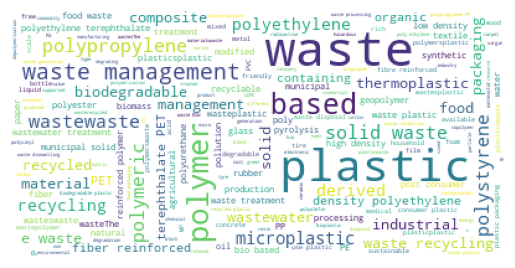

In [38]:
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

# Joining all the processed lines together. Whole PDF
long_string = ''.join([str(i) for i in y])

# WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=100000, 
                      contour_width=5, 
                      contour_color='steelblue',
                      repeat = False,
                      relative_scaling = 0.5,
                      min_font_size=3,
                      max_font_size = 40)
wordcloud.generate(long_string)

# Visualizing
wordcloud.to_image()

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('/home/user3/Documents/avan_phd/Objective_3/Objective_3_QnA/result/word_cloud/react_word_cloud.pdf',dpi=2000,bbox_inches='tight')
plt.show()